In [1]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical

In [2]:
cifar10.__doc__

'CIFAR10 small images classification dataset.'

In [3]:
(train_features,train_labels), (test_features,test_labels) = cifar10.load_data()

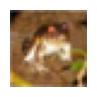

In [4]:
plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(train_features[0],cmap=plt.cm.binary)
plt.show()

In [5]:
train_features.shape

(50000, 32, 32, 3)

In [6]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

In [7]:
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [8]:
from keras.models import Sequential,Functional,Model
from keras.layers import Input,Dense,Flatten

# model = Sequential([
#     Dense(200,activation='relu',input_shape = (32,32,3)),
#     Flatten(),
#     Dense(150,activation='relu'),
#     Dense(10,activation='softmax')
# ])
input_layer = Input(shape=(32,32,3))
x = Flatten()(input_layer)
x = Dense(units=200,activation='relu')(x)
x = Dense(units=150,activation='relu')(x)

output_layer = Dense(units=10,activation='softmax')(x)

model = Model(input_layer,output_layer)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.optimizers import Adam
optim = Adam(learning_rate=0.0005)
model.compile(optimizer = optim,loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
model.fit(train_features,train_labels,
          batch_size = 32,
          epochs = 10,
          shuffle = True
          )

Epoch 1/10
1563/1563 [==============================] - 11s 5ms/step - loss: 1.8472 - accuracy: 0.3365
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6552 - accuracy: 0.4114
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5886 - accuracy: 0.4337
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5345 - accuracy: 0.4549
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4919 - accuracy: 0.4677
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4665 - accuracy: 0.4773
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4360 - accuracy: 0.4888
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4114 - accuracy: 0.4976
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3916 - accuracy: 0.5047
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.36

In [26]:
loss, acc = model.evaluate(test_features,test_labels)
print(round(acc*100,2))

313/313 [==============================] - 5s 16ms/step - loss: 1.3751 - accuracy: 0.5206
52.06
